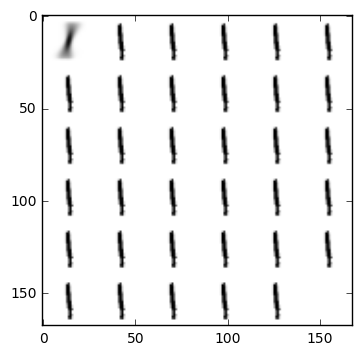

In [47]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import mnist
from sklearn.decomposition import PCA
%matplotlib inline

# Get the training set and the element to approximate. Return a list of PCA approximations from 0 to q order
def generate_PCA_approx_list(train_set, elem_to_aprox, q):
    list_PCA_Aprox = []
    number_of_components = q
    for q in xrange(0,number_of_components):
        temp_PCA = PCA(n_components=q)
        temp_PCA.fit(train_set)

        result = temp_PCA.mean_
        for i in xrange(len(temp_PCA.components_)):
            temp_component = temp_PCA.components_[i]
            result += np.dot(np.dot(temp_component,temp_component.T),(elem_to_aprox-temp_PCA.mean_))
        list_PCA_Aprox.append(result)
    return list_PCA_Aprox

        
# Generating incresing number of approximations for 1 label 
train_values, label_values = mnist.read_mnist_training_set("")
ones_arrays = train_values[label_values==1]
one_of_choice = ones_arrays[2]

approx_result = generate_PCA_approx_list(ones_arrays, one_of_choice, 35)
mnist.montage(approx_result)


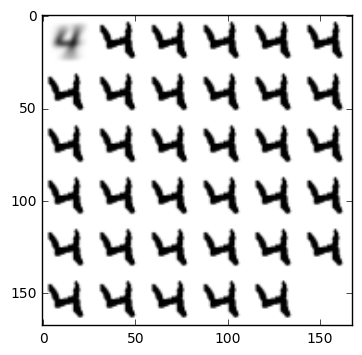

In [48]:
# Generating incresing number of approximations for 4 label 
four_arrays = train_values[label_values==4]
four_of_choice = four_arrays[2]
mnist.montage([four_of_choice])

four_approx_result = generate_PCA_approx_list(four_arrays, four_of_choice, 35)
mnist.montage(four_approx_result)


3 - a) A lossy compression scheme could be to store just the 0th order approximation for each of the numbers, which is equal to the mean for each of the labels. 

b) There are 10 labels and 120K observations in the MNIST dataset and each one has 784 long values (x 4bytes ~= 3Kbytes) in the original dataset. In the new scheme, since we will have only one representation for each label, the final overhead could be 10(labels) x 3Kbytes (for each compressed number) + 120.000(nibles-4bits for indexing observation to proper representation) = 60K + 30K = 90Kbytes of total overhead for storage. Since we have 120.000 digits, the per-digit storage would be 0.75 bytes.